# 04.02 - DATA CLEANING

In [ ]:
!rm -rf Proyecto-I.A

In [ ]:
!git clone https://github.com/doviedob/Proyecto-I.A.git

Cloning into 'Proyecto-I.A'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), 2.31 MiB | 1.88 MiB/s, done.


In [ ]:
import pandas as pd
d = pd.read_csv('Proyecto-I.A/train_recortado_con_faltantes.csv')

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources



## Based on [Kaggle House Pricing Prediction Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

- Inspect and learn from the competition [Notebooks](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks)
- You must make available to this notebook the `train.csv` file from the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) section. If running this notebook in Google Colab you must upload it in the notebook files section in Colab.

In [ ]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline
#d = pd.read_csv("train_recortado_con_faltantes.csv", index_col="ID_code")
d.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47
0,train_0,2,8.9255,4,11.9081,5.0930,NaN,-9.2834,5.1187,18.6266,...,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136
1,train_1,2,11.5006,2,13.8588,5.3890,NaN,7.0433,5.6208,16.5338,...,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948
2,train_2,2,8.6093,1,12.0805,7.8928,NaN,-9.0837,6.9427,14.6155,...,10.8917,0.9003,-13.5174,2.2439,11.5283,12.0406,4.1006,-7.9078,11.1405,-5.7864
3,train_3,2,11.0604,1,8.9522,7.1957,NaN,-1.8361,5.8428,14.9250,...,9.1738,0.6665,-3.8294,-1.0370,11.7770,11.2834,8.0485,-24.6840,12.7404,-35.1659
4,train_4,2,9.8369,1,12.8746,6.6375,NaN,2.4486,5.9405,19.2514,...,19.3038,1.4450,-5.5963,14.0685,11.9171,11.5111,6.9087,-65.4863,13.8657,0.0444


In [ ]:
## KEEPOUTPUT
print (d.shape)

(10000, 50)


## We must repair the missing data in the following columns

**Possible repair actions**:

- Remove row or column
- Replace value (why what?)

In [ ]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

var_4     9202
var_11    9170
var_34    9176
dtype: int64

### Inspect and understand missing data

In [ ]:
## KEEPOUTPUT
def plot_missing(col, target):
    
    def f1(): 
        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(k.index, k.values)
        else:
            sns.distplot(d[col].dropna())
        plt.title("distribution of %s"%col)
        plt.grid()
        
    def f2(): 
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.distplot(k[target][k[col]==v], 
                                 hist_kws=dict(alpha=.3), 
                                 kde_kws=dict(linewidth=1, alpha=.8),
                                 label=v);
            if sum(d[col].isna())>1:
                sns.distplot(d[target][d[col].isna()], 
                             hist_kws=dict(alpha=.8), 
                             kde_kws=dict(linewidth=1, alpha=1),
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))
        
    def f3(): 
        n = np.sum(d[col].isna())
        if n>1:
            sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
        sns.distplot(d[target][~d[col].isna()], color="blue",  hist_kws=dict(alpha=.3), label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()
        
    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))


<ipython-input-7-d2104c0ec44c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col].dropna())
<ipython-input-7-d2104c0ec44c>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
<ipython-input-7-d2104

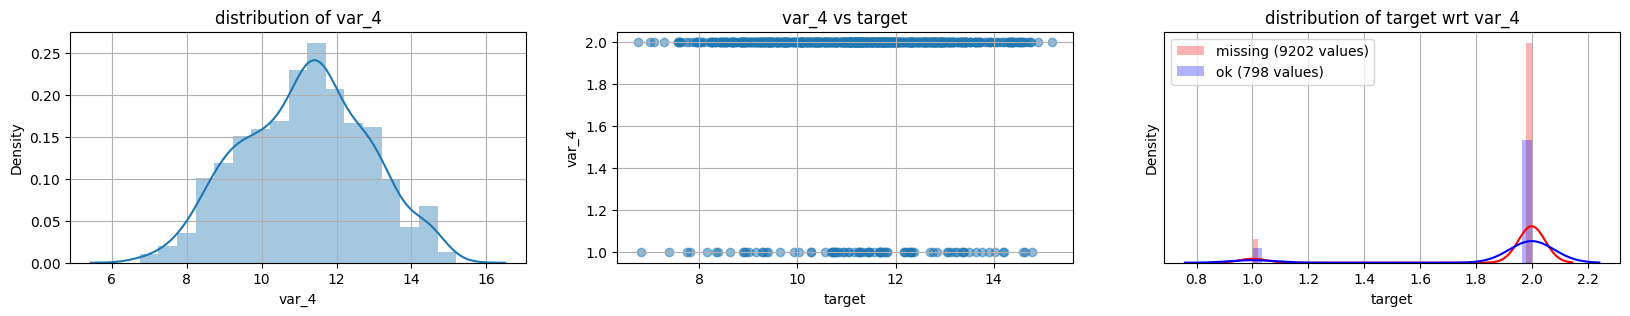

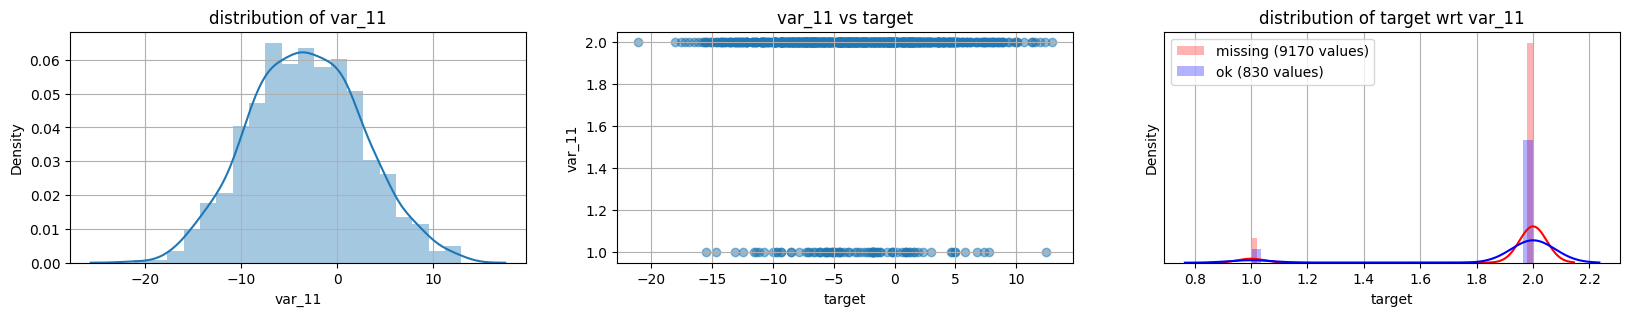

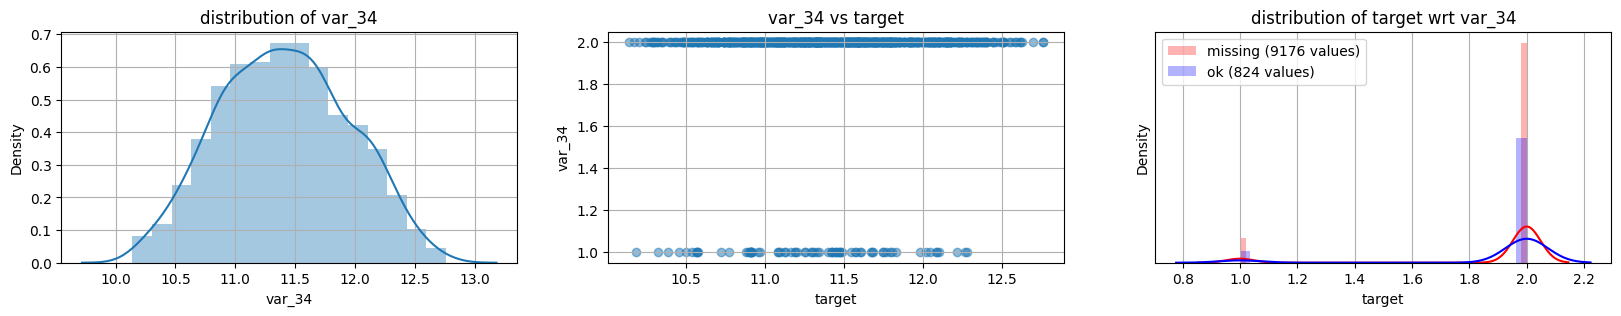

In [ ]:
## KEEPOUTPUT
for col in k[k!=0].index:
    plot_missing(col, target="target")

### common sense

- too many missing data in **Alley**. Information might only help non-missing items with little impact on
- missing data in **Bsmt\*** seem all the same
- missing data in **Garage\*** sell all the same

## For continuous variables

### Three substitution techniques

- by a fixed value (zero)
- by a fixed value (the mean)
- sampling from an equivalent normal (same mean and std)

**First** we create the different datasets:

- `dn`: original data only with numerical attributes
- `dl0`: substituting missing values with zero
- `dlm`: substituting missing values with the mean
- `dlr`: substituting missing values with an equivalent normal (same mean and stdev)

In [ ]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [ ]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0,150])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,150])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,150])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,150])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

(10000, 46)


<ipython-input-5-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-5-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k, hist_kws={"alpha": .8});
<ipython-input-5-44e0e1649163>:3: UserWarning: 

`distplot` is a deprecated func

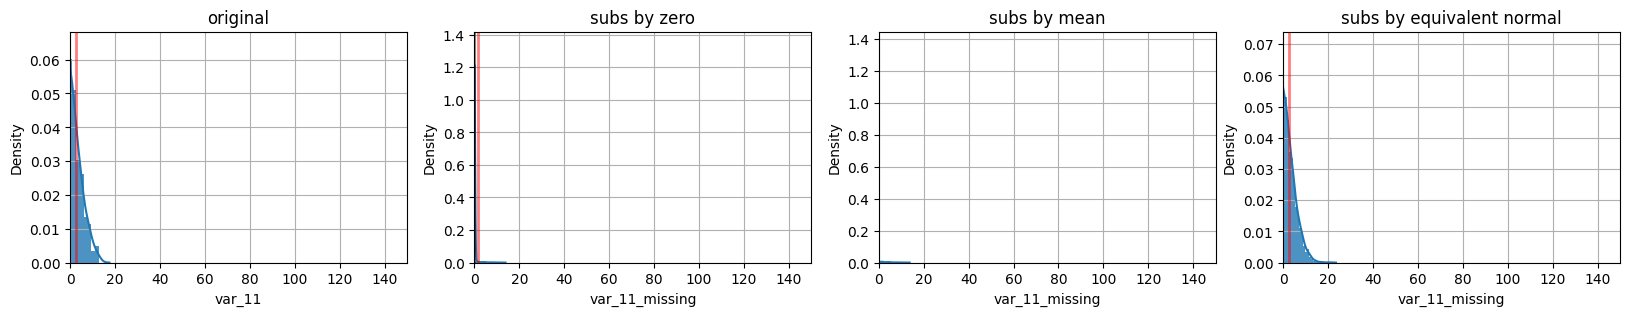

In [ ]:
## KEEPOUTPUT
dn, dl0, dlm, dlr, na_idxs = subs_policies(d, "var_11")

### Validation workflow for repairing missing values on **LotFrontage**

**Which policy for repairing missing data is best?**

Short answer: **we do not know** $\rightarrow$ **we must seek evidence**

We will now integrate them in an ML workflow, creating predictive models and seeking for evidence if models improve or not when using different policies for repairing missing data.

We train a lot of models (resampling training data) with each dataset and then run a classical hypothesis test on model performance:
    
- $e_1$: control group, models trained without **LotFrontage**
- $e_2$: population group, models trained with **LotFrontage** with fillna=0

Our null hypothesis (there is no effect in using the new variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$

Our test hypothesis (including fillna=0 improves models):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$


In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import ttest_ind

def getXY (dn):
    xcols = [i for i in dn.columns if i!="target"]
    X = dn[xcols].values.astype(float)
    y = dn.target.values.astype(float)
    return X,y,xcols

def experiment(dn, estimator, n_models=20, test_size=.3):
    X,y,_ = getXY(dn)
    r = cross_val_score(estimator, X, y, cv=ShuffleSplit(n_models, test_size=test_size), 
                        scoring=make_scorer(mean_absolute_error))
    return r

def HTest(ref_dataset, h_datasets, n_models=30, experiment=experiment, **kwargs):
    estimator = RandomForestRegressor(n_estimators=20)
    re = [experiment(i, estimator, n_models=n_models, **kwargs) for i in pbar([ref_dataset]+h_datasets)]

    for r in re[1:]:
        print (ttest_ind(re[0],r))


In [ ]:
## KEEPOUTPUT
dl0.head()

,target,var_0,var_1,var_2,var_3,var_5,var_6,var_7,var_8,var_9,...,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_21_missing
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,2.0,8.9255,4.0,11.9081,5.0930,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,4
train_1,2.0,11.5006,2.0,13.8588,5.3890,7.0433,5.6208,16.5338,3.1468,8.0851,...,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,3
train_2,2.0,8.6093,1.0,12.0805,7.8928,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,0.9003,-13.5174,2.2439,11.5283,12.0406,4.1006,-7.9078,11.1405,-5.7864,4
train_3,2.0,11.0604,1.0,8.9522,7.1957,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,0.6665,-3.8294,-1.0370,11.7770,11.2834,8.0485,-24.6840,12.7404,-35.1659,1
train_4,2.0,9.8369,1.0,12.8746,6.6375,2.4486,5.9405,19.2514,6.2654,7.6784,...,1.4450,-5.5963,14.0685,11.9171,11.5111,6.9087,-65.4863,13.8657,0.0444,4


In [ ]:
## KEEPOUTPUT
HTest(dn, [dl0, dlm, dlr], n_models=50)

100% (4 of 4) |##########################| Elapsed Time: 0:39:58 Time:  0:39:58


Ttest_indResult(statistic=0.6629684255895596, pvalue=0.5089071420157829)
Ttest_indResult(statistic=0.37363022540201296, pvalue=0.709486507198748)
Ttest_indResult(statistic=1.2261701769043853, pvalue=0.2230728191089292)


In [ ]:
## KEEPOUTPUT
HTest(dn, [dl0, dlm, dlr], n_models=50)

100% (4 of 4) |##########################| Elapsed Time: 0:41:07 Time:  0:41:07


Ttest_indResult(statistic=-2.255497653094319, pvalue=0.02632577800042984)
Ttest_indResult(statistic=-1.4539483000848858, pvalue=0.14915577291743656)
Ttest_indResult(statistic=-2.420770448789794, pvalue=0.01732861866297113)


No $p$ value is really significative so the different substitution policies do no help improve overall in this simplified setting. More over, repeated experiments show to evidence of any approach better than others (always better $p$ value)

Some models provide us with a measure of **feature importance**. Observe the behaviour of the most important variables in the scatter matrix plot of previous notebook.

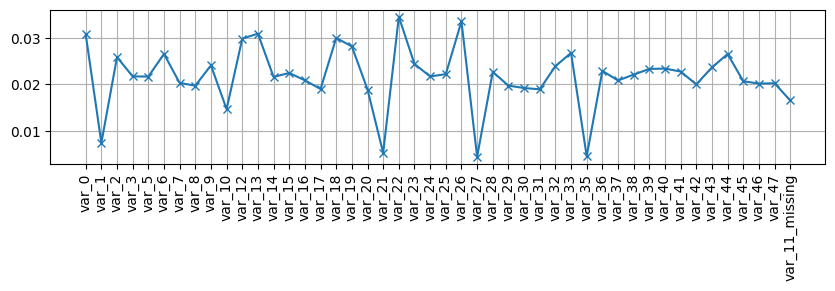

In [ ]:
## KEEPOUTPUT
X, y, xcols = getXY(dlr)
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X,y);
plt.figure(figsize=(10,2)); plt.grid()
plt.plot(rf.feature_importances_, label="est1", marker="x")
plt.xticks(range(len(xcols)), xcols, rotation="vertical");

so somehow it is understandable that providing values for this missing variable does not have so much impact.

We could try to see **ONLY** how records with **THIS** missing data behave. Observe that `na_idxs` marks which rows contain `na` values so that they are used to measure validation performance. 

There is still no clear evidence that any filling strategy for missing values  is better than other.

In [ ]:
def na_cross_val_score(estimator, X, y, cv, scoring, val_idxs):
    r = []
    for tr_idxs, ts_idxs in cv.split(X):
        tr_idxs, ts_idxs = np.r_[tr_idxs], np.r_[ts_idxs]
        rf.fit(X[tr_idxs], y[tr_idxs])
        valts_idxs = np.r_[[i for i in ts_idxs if i in val_idxs]]
        r.append(scoring(rf, X[valts_idxs], y[valts_idxs]))    
    return r


def na_experiment(dn, estimator, na_idxs, n_models=20, test_size=.3):
    X,y,_ = getXY(dn)
    r = na_cross_val_score(estimator, X, y, cv=ShuffleSplit(n_models, test_size=test_size), 
                        scoring=make_scorer(mean_absolute_error), val_idxs=na_idxs)
    return r


In [ ]:
## KEEPOUTPUT
HTest(dn, [dl0, dlm, dlr], experiment=na_experiment, na_idxs=na_idxs, n_models=50)

  0% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

KeyboardInterrupt: ignored

In [ ]:
HTest(dn, [dl0, dlm, dlr], experiment=na_experiment, na_idxs=na_idxs, n_models=50)

  0% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

IndexError: ignored

## For categorical features

- we must convert them to numerical
    - if categories are **ordered** $\rightarrow$ convert to positive integer
    - otherwise $\rightarrow$ convert to one hot
- we must decide on missing values:
    - remove row or column
    - assign an existing value
    - assign a new value

In [ ]:
## KEEPOUTPUT
col = "var_11"
print ("missing", sum(d[col].isna()))
d[col].value_counts()

In [ ]:
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col]
                      )
    k = to_onehot(d[col].values)
    r = pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index).join(d)
    del(r[col])
    return r

observe **onehot** encoding

In [ ]:
## KEEPOUTPUT
d[[col]].head(10)

,var_27
ID_code,
train_0,4
train_1,0
train_2,0
train_3,2
train_4,3
train_5,3
train_6,4
train_7,4
train_8,0


In [ ]:
## KEEPOUTPUT
replace_column_with_onehot(d[[col]].dropna().copy(), col).head(10)

,var_27_0,var_27_1,var_27_2,var_27_3,var_27_4
ID_code,,,,,
train_0,0,0,0,0,1
train_1,1,0,0,0,0
train_2,1,0,0,0,0
train_3,0,0,1,0,0
train_4,0,0,0,1,0
train_5,0,0,0,1,0
train_6,0,0,0,0,1
train_7,0,0,0,0,1
train_8,1,0,0,0,0


we now create a onehot encoding for each case:
- create a separate value for missing data
- set missing data to an existing category. In this case we will set it to the closest category distribution wrt the target variable according the plots above

In [ ]:
## KEEPOUTPUT
rm1 = replace_column_with_onehot(d[[col]].fillna("missing").copy(), col)
rm2 = replace_column_with_onehot(d[[col]].fillna("Unf").copy(), col)

In [ ]:
## KEEPOUTPUT
rm1.head()

,var_27_0,var_27_1,var_27_2,var_27_3,var_27_4
ID_code,,,,,
train_0,0,0,0,0,1
train_1,1,0,0,0,0
train_2,1,0,0,0,0
train_3,0,0,1,0,0
train_4,0,0,0,1,0


In [ ]:
## KEEPOUTPUT
rm2.head()

,var_27_0,var_27_1,var_27_2,var_27_3,var_27_4
ID_code,,,,,
train_0,0,0,0,0,1
train_1,1,0,0,0,0
train_2,1,0,0,0,0
train_3,0,0,1,0,0
train_4,0,0,0,1,0


In [ ]:
## KEEPOUTPUT
dm1 = dn.join(rm1)
dm2 = dn.join(rm2)
dm1.shape, dm2.shape

((10000, 51), (10000, 51))

again, do hypothesis testing to seek for evidence for improvements for any of the methods

In [ ]:
## KEEPOUTPUT
HTest(dn, [dm1, dm2], experiment=experiment, n_models=50)

100% (3 of 3) |##########################| Elapsed Time: 0:30:45 Time:  0:30:45


Ttest_indResult(statistic=-0.7594691577619029, pvalue=0.44939497372728043)
Ttest_indResult(statistic=0.029780755722108664, pvalue=0.9763024714902865)


In [ ]:
## KEEPOUTPUT
na_idxs = np.argwhere(d[col].isna().values)[:,0]
HTest(dn, [dm1, dm2], experiment=na_experiment, na_idxs=na_idxs, n_models=50)

  0% (0 of 3) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

IndexError: ignored

Again, no $p$ value is sufficiently significative to provide evidence for improved classification alone. However, approach number 2 (substituting missing data with **Unf**) does seem to consistently get better $p$ value and, thus, more chance to improve performance when combined with other data cleaning choices. 

Observe also how the **missing** category dilutes the importance of **Unf** after other variables are taken out.